In [1]:
import os
os.chdir('../..')

import numpy as np
import pandas as pd
import torch
import pickle
from tqdm import tqdm
from molgrad.utils import DATA_PATH

In [2]:
with open(os.path.join(DATA_PATH, 'cyp', 'data_cyp.pt'), 'rb') as handle:
    inchis, values = pickle.load(handle)

In [3]:
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcTPSA
from rdkit.Chem.Lipinski import NumHDonors
from rdkit.Chem.Descriptors import MolWt

from rdkit.Chem.inchi import MolFromInchi

mws = []
logps = []
tpsas = []
nhdonors = []

for inchi in inchis:
    mol = MolFromInchi(inchi)
    mws.append(MolWt(mol))
    logps.append(MolLogP(mol))
    tpsas.append(CalcTPSA(mol))
    nhdonors.append(NumHDonors(mol))

og_properties = pd.DataFrame({'mws': mws,
                              'logps': logps,
                              'tpsas': tpsas,
                              'nhdonors': nhdonors,
                              'values': values})

RDKit WARNING: [15:24:12] Enabling RDKit 2019.09.3 jupyter extensions


In [4]:
og_properties

,mws,logps,tpsas,nhdonors,values
0,210.285,0.0696,48.39,0,0.0
1,172.188,0.8018,65.34,0,0.0
2,357.457,3.0511,111.35,3,0.0
3,278.399,3.5434,15.27,1,0.0
4,323.436,3.8460,29.54,0,1.0
...,...,...,...,...,...
9115,324.409,2.6298,52.71,1,1.0
9116,259.358,2.3291,36.75,1,0.0
9117,289.375,4.5714,29.10,1,0.0
9118,309.373,1.6142,62.22,0,0.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

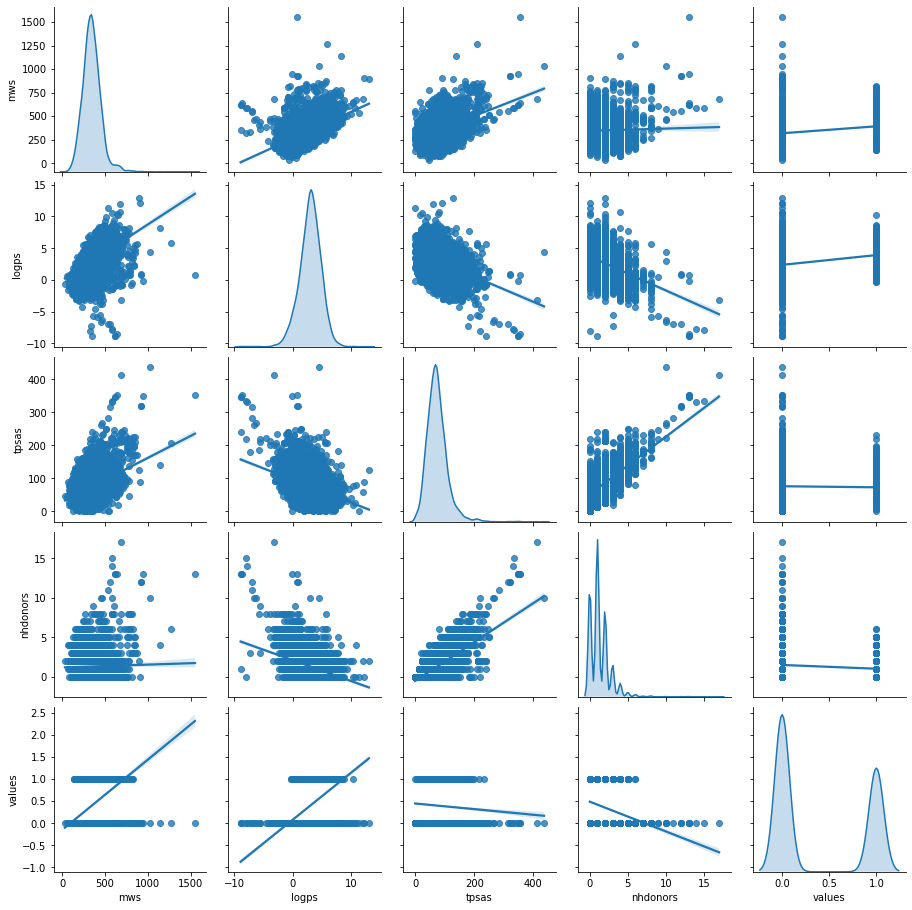

In [6]:
sns.pairplot(og_properties, diag_kind="kde", kind="reg")

In [7]:
np.corrcoef(og_properties.values.T)

array([[ 1.        ,  0.50074668,  0.40524338,  0.02881398,  0.34305175],
       [ 0.50074668,  1.        , -0.37085134, -0.37654622,  0.40535991],
       [ 0.40524338, -0.37085134,  1.        ,  0.65416787, -0.04526022],
       [ 0.02881398, -0.37654622,  0.65416787,  1.        , -0.17961324],
       [ 0.34305175,  0.40535991, -0.04526022, -0.17961324,  1.        ]])

In [8]:
with open(os.path.join(DATA_PATH, 'importances_scaled.pt'), 'rb') as handle:
    importances = pickle.load(handle)

In [9]:
global_importances = np.vstack(importances['cyp_global'][1]) #v2
global_importances.shape

(9120, 4)

In [10]:
global_importances = np.array(global_importances) * 100
global_importances = pd.DataFrame(data=global_importances, columns=['mws', 'tpsas', 'logps', 'nhdonors'])
global_importances['values'] = values

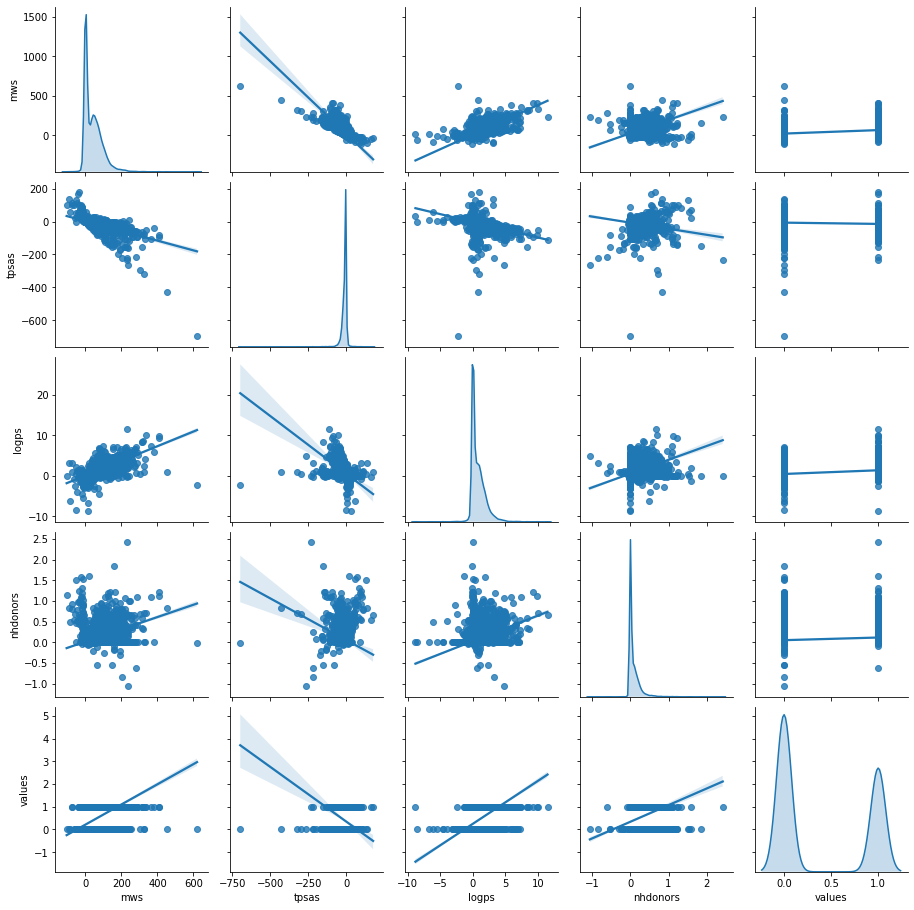

In [11]:
sns.pairplot(global_importances, diag_kind="kde", kind="reg")

In [12]:
np.corrcoef(global_importances.values.T)

array([[ 1.        , -0.73579847,  0.82099805,  0.50030331,  0.44182939],
       [-0.73579847,  1.        , -0.51970007, -0.27236094, -0.19296705],
       [ 0.82099805, -0.51970007,  1.        ,  0.45928763,  0.4163019 ],
       [ 0.50030331, -0.27236094,  0.45928763,  1.        ,  0.216804  ],
       [ 0.44182939, -0.19296705,  0.4163019 ,  0.216804  ,  1.        ]])